# Manipulate data with tensorflow

In this exercise you will practice manipulating tensors and forming tensor datasets with tensorflow.
We are taking advantage of this moment to let you only manipulate data as we will be focusing much more on building models in the following days!

In [1]:
# import tensorflow
import tensorflow as tf
tf.__version__

'2.4.1'

## Practice tensor operations

* Create a **constant tensor** named `tensor1` containing the values `[0, 1, 2, 3, 4, 5, 6, 7]` and a **variable tensor** named `tensor2` containing the values `[0, 1, 2, 0, 1, 2]`

In [4]:
tensor1 = tf.constant([0, 1, 2, 3, 4, 5, 6, 7])
print("tensor1:", tensor1)
tensor2 = tf.Variable([0, 1, 2, 0, 1, 2])
print("tensor2:", tensor2)

tensor1: tf.Tensor([0 1 2 3 4 5 6 7], shape=(8,), dtype=int32)
tensor2: <tf.Variable 'Variable:0' shape=(6,) dtype=int32, numpy=array([0, 1, 2, 0, 1, 2], dtype=int32)>


* Reshape `tensor1` so it has 2 columns and 4 rows, and `tensor2` so it has 2 rows and 3 columns.
Has this operation changed the nature of `tensor2`? How could you change it back to its former nature?

In [5]:
tensor1 = tf.reshape(tensor1, (4,2))
print("tensor1:", tensor1)
tensor2 = tf.reshape(tensor2, (2, 3))
print("tensor2:", tensor2)

tensor1: tf.Tensor(
[[0 1]
 [2 3]
 [4 5]
 [6 7]], shape=(4, 2), dtype=int32)
tensor2: tf.Tensor(
[[0 1 2]
 [0 1 2]], shape=(2, 3), dtype=int32)


In [6]:
tensor2 = tf.Variable(tensor2)
print("tensor2:", tensor2)

tensor2: <tf.Variable 'Variable:0' shape=(2, 3) dtype=int32, numpy=
array([[0, 1, 2],
       [0, 1, 2]], dtype=int32)>


* Use a tensorflow function to create `tensor3` with the same shape as `tensor2` but filled with 1

In [8]:
tensor3 = tf.ones_like(tensor2)
print("tensor2:", tensor3)

tensor2: tf.Tensor(
[[1 1 1]
 [1 1 1]], shape=(2, 3), dtype=int32)


* Modify the value of `tensor2` by substracting the values in `tensor3`, use a method so that it is an in place operation. Why would not you be able to do that with `tensor1`?

In [10]:
tensor2.assign_sub(tensor3)
print("tensor2:", tensor2)

tensor2: <tf.Variable 'Variable:0' shape=(2, 3) dtype=int32, numpy=
array([[-1,  0,  1],
       [-1,  0,  1]], dtype=int32)>


* Can you multiply `tensor1` and `tensor2` pointwise? How about with a matrix multiplication? Display the result of the possible operations.

In [12]:
tf.matmul(tensor1, tensor2)

<tf.Tensor: shape=(4, 3), dtype=int32, numpy=
array([[ -1,   0,   1],
       [ -5,   0,   5],
       [ -9,   0,   9],
       [-13,   0,  13]], dtype=int32)>

In [13]:
tensor1 * tensor2

InvalidArgumentError: ignored

## Tabular data

This part of the exercise will let you deal with tabular data in order to make batch datasets ready to be fed to deep learning models.

* Using the `sklearn.datasets` module, load the mnist dataset thanks to the `load_digits` function.

In [15]:
from sklearn.datasets import load_digits

* This function gives you a Data Bunch object, which works basically like a dictionnary. Create an object data containing the value of the `data` key and an object target containing the value of the `target` key.

In [41]:
data, target = load_digits(return_X_y=True)

print(data)
print(target)

[[ 0.  0.  5. ...  0.  0.  0.]
 [ 0.  0.  0. ... 10.  0.  0.]
 [ 0.  0.  0. ... 16.  9.  0.]
 ...
 [ 0.  0.  1. ...  6.  0.  0.]
 [ 0.  0.  2. ... 12.  0.  0.]
 [ 0.  0. 10. ... 12.  1.  0.]]
[0 1 2 ... 8 9 8]


* What is the shape of `data` and `target`? Can you understand what these objects represent using the `DESCR` key of the Data Bunch?

In [42]:
print(f"data shape: {data.shape}")
print(f"target shape: {target.shape}")
print(load_digits().DESCR)

data shape: (1797, 64)
target shape: (1797,)
.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 5620
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and th

* Can you visualize the first image in data ?

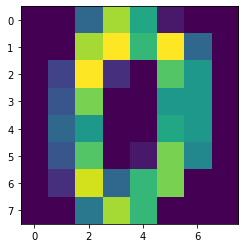

In [43]:
from matplotlib import pyplot as plt

plt.imshow(data[0, :].reshape(8, 8))
plt.show()

* The pixel values from those images is encoded in integers between 0 and 255, it is always better to feed your deep learning models with reasonnably scaled data to avoid the network not being able to learn. To do this we'll divide the value in each pixel by 255. Do this.

In [44]:
data /= 255

### Technique 1: Split the data with sklearn

Most of the time when you will be dealing with data you want to feed to a deap learning model, you will have a pandas DataFrame or numpy array at some points that contains some representation of your data and the associated values of the target variable. In those cases, it's easier to just split the data in a train and validation set using sklearn. (Remember that for very large datasets or for training and evaluating deep learning models we most of the time use the three way hold out method, where on set serves as the training set, one as the validation set to control for overfitting, and the last one is the test set against which we will evaluate the model).

* Split the data and target into three different parts, one containing the train set (60%), another with the validation set (20%), and a third with the test set (20%), using sklearn.

In [45]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.2, random_state=0)

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=0) 

print(f"X train : {X_train.shape}")
print(f"X val : {X_val.shape}")
print(f"X test : {X_test.shape}")
print(f"y train : {y_train.shape}")
print(f"y val : {y_val.shape}")
print(f"y test : {y_test.shape}")


X train : (1077, 64)
X val : (360, 64)
X test : (360, 64)
y train : (1077,)
y val : (360,)
y test : (360,)


* Form three tensor slice datasets using the training validation and test data.

In [35]:
train = tf.data.Dataset.from_tensor_slices((X_train, y_train))
val = tf.data.Dataset.from_tensor_slices((X_val, y_val))
test = tf.data.Dataset.from_tensor_slices((X_test, y_test))
print(f"train : {train}")
print(f"val : {val}")
print(f"test : {test}")

train : <TensorSliceDataset shapes: ((64,), ()), types: (tf.float64, tf.int64)>
val : <TensorSliceDataset shapes: ((64,), ()), types: (tf.float64, tf.int64)>
test : <TensorSliceDataset shapes: ((64,), ()), types: (tf.float64, tf.int64)>


* Shuffle these tensor slice datasets and arrange them in batches of 8 observations, then display one batch from each of these batch datasets.

In [37]:
train_batch = train.shuffle(len(X_train)).batch(8)
val_batch = val.shuffle(len(X_val)).batch(8)
test_batch = test.shuffle(len(X_test)).batch(8)

x, y = next(iter(train_batch))
print("train batch shape", x.shape, y.shape)
x, y = next(iter(val_batch))
print("val batch", x.shape, y.shape)
x, y = next(iter(test_batch))
print("test batch", x.shape, y.shape)

train batch shape (8, 64) (8,)
val batch (8, 64) (8,)
test batch (8, 64) (8,)


We are now ready to start training deep learning models!

## Technique 2: split using tensorflow

This technique is not so recommended because tensorflow is not able to work with datasets in the same way that sklearn does, it is not as practical to split the data in a random way, but we will show you how it can be done, as sometimes you will strictly be working with tensorflow objects.

* Create a tensor slice dataset object using `data`and `target`.

In [46]:
full_ds = tf.data.Dataset.from_tensor_slices((data, target))
print("full_ds", full_ds)

full_ds <TensorSliceDataset shapes: ((64,), ()), types: (tf.float64, tf.int64)>


* Using the commands take and skip, separate the tensor slice dataset into a train object containing 60% of the data, a val object (20%) and a test object (20%).

In [54]:
n_observations = len(data)
n_train = int(0.6 * n_observations)
n_val = int(0.5 * (n_observations - n_train))
n_test = n_observations - n_train - n_val

shuffle_full_ds = full_ds.shuffle(len(data))
train = shuffle_full_ds.take(n_train)
val = shuffle_full_ds.skip(n_train).take(n_val)
test = shuffle_full_ds.skip(n_train + n_val).take(n_test)

* Use methods shuffle and batch in order to create batch datasets with batches of 8 observations for train, val, and test, and show one batch from each of these objects.

In [55]:
train_batch = train.shuffle(len(X_train)).batch(8)
val_batch = val.shuffle(len(X_val)).batch(8)
test_batch = test.shuffle(len(X_test)).batch(8)

x, y = next(iter(train_batch))
print("train batch shape", x.shape, y.shape)
x, y = next(iter(val_batch))
print("val batch", x.shape, y.shape)
x, y = next(iter(test_batch))
print("test batch", x.shape, y.shape)

train batch shape (8, 64) (8,)
val batch (8, 64) (8,)
test batch (8, 64) (8,)


Congratulations, you know two different ways of forming datasets that are fit for training deep learning models with tensorflow! This skill will come in very handy as we will try to focus more on building models from now on, and put less focus on preprocessing.
Until then, happy learning!